# TASK 2

# INSTEAD OF USING ALL THE WORDS IN THE DATASET USING THE TOP 1000 WORDS BASED ON THEIR TFIDF VALUES

#### IN TASK1 WE HAVE COUNTVECTORIZED ALL THE FEATURES AND STACKED THEM DEPLOYED INTO THE MODELS.NOW WE GONNA USE THE TOP 1000 WORDS BASED ON THEIR TFIDF VALUES AND DEPLOY THEM INTO THE MODELS.

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1ClZQUuBTtIatBFZpPz7rXimqukBUDPWc' # The shareable link

In [3]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ClZQUuBTtIatBFZpPz7rXimqukBUDPWc


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('personalcancerassignmentdata.csv')  


In [0]:
datas=pd.read_csv('personalcancerassignmentdata.csv')

In [0]:
datas.rename(columns={'TEXT':'Text'}, inplace=True)

In [7]:
datas.head(5)

,Unnamed: 0,ID,Gene,Variation,Class,Text,genevariation
0,0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...,FAM58A Truncating_Mutations
1,1,1,CBL,W802*,2,abstract background non small cell lung cancer...,CBL W802*
2,2,2,CBL,Q249E,2,abstract background non small cell lung cancer...,CBL Q249E
3,3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,CBL N454D
4,4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...,CBL L399V


#### we will preprocess the data and consider the words from the text data with high tfidf value
#### do the featrurization and employ into the models check how models are performing.

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [0]:
import re
stop=set(stopwords.words('english'))
def preprocessing(text,index,column):
    if type(text) is not int:
        string=""
        text=re.sub('[^a-zA-Z0-9]',' ',text)
        text=re.sub('\s+',' ',text)
        text=text.lower()
        for word in text.split():
            if not word in stop:
                string=string+word+" "
        datas[column][index]=string
        

In [21]:
import time
starttime=time.clock()
for index,row in datas.iterrows():
    if type(row['Text']) is str:
        preprocessing(row['Text'],index,'Text')
print(time.clock()-starttime)

391.388853


In [22]:
print(datas.columns)

Index(['Unnamed: 0', 'ID', 'Gene', 'Variation', 'Class', 'Text',
       'genevariation'],
      dtype='object')


In [23]:

datas=datas[['ID','Gene','Variation','Class','Text']]
datas.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [0]:
datas['Variation']=datas['Variation'].str.replace('*','')

In [0]:
task2data=datas[['Text','Variation','Gene']]
task2y=datas['Class']
from sklearn.model_selection import train_test_split
tx,testx,ty,testy=train_test_split(task2data,task2y,test_size=0.2)
trainx,cvx,trainy,cvy=train_test_split(tx,ty,test_size=0.2)

In [0]:
genevectorizer=TfidfVectorizer()
traingenefeaturetfidfcoding=genevectorizer.fit_transform(trainx['Gene'])
testgenefeaturetfidfcoding=genevectorizer.transform(testx['Gene'])
cvgenefeaturetfidfcoding=genevectorizer.transform(cvx['Gene'])

In [0]:
from sklearn.preprocessing import normalize
traingenefeaturetfidfcoding=normalize(traingenefeaturetfidfcoding)
testgenefeaturetfidfcoding=normalize(testgenefeaturetfidfcoding)
cvgenefeaturetfidfcoding=normalize(cvgenefeaturetfidfcoding)

In [0]:
variationvectorizer=TfidfVectorizer()
trainvariationfeaturetfidfcoding=variationvectorizer.fit_transform(trainx['Variation'])
testvariationfeaturetfidfcoding=variationvectorizer.transform(testx['Variation'])
cvvariationfeaturetfidfcoding=variationvectorizer.transform(cvx['Variation'])

In [0]:
trainvariationfeaturetfidfcoding=normalize(trainvariationfeaturetfidfcoding)
testvariationfeaturetfidfcoding=normalize(testvariationfeaturetfidfcoding)
cvvariationfeaturetfidfcoding=normalize(cvvariationfeaturetfidfcoding)

In [0]:
textvector=TfidfVectorizer(min_df=3,max_features=1000)
traintextfeaturetfidfcoding=textvector.fit_transform(trainx['Text'])
testtextfeaturetfidfcoding=textvector.transform(testx['Text'])
cvtextfeaturetfidfcoding=textvector.transform(cvx['Text'])


In [0]:
traintextfeaturetfidfcoding=normalize(traintextfeaturetfidfcoding)
testtextfeaturetfidfcoding=normalize(testtextfeaturetfidfcoding)
cvtextfeaturetfidfcoding=normalize(cvtextfeaturetfidfcoding)

In [0]:
from scipy.sparse import hstack
task2traindata=hstack((traingenefeaturetfidfcoding,trainvariationfeaturetfidfcoding,traintextfeaturetfidfcoding)).tocsr()
task2testdata=hstack((testgenefeaturetfidfcoding,testvariationfeaturetfidfcoding,testtextfeaturetfidfcoding)).tocsr()
task2cvdata=hstack((cvgenefeaturetfidfcoding,cvvariationfeaturetfidfcoding,cvtextfeaturetfidfcoding)).tocsr()

In [34]:
print(task2traindata.shape)
print(task2testdata.shape)
print(task2cvdata.shape)

(2124, 3189)
(665, 3189)
(532, 3189)


## utility function to get the imporatnt feature names

In [0]:

def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = TfidfVectorizer()
    var_count_vec = TfidfVectorizer()
    text_count_vec = TfidfVectorizer(min_df=3,max_features=1000)
    
    gene_vec = gene_count_vec.fit(trainx['Gene'])
    var_vec  = var_count_vec.fit(trainx['Variation'])
    text_vec = text_count_vec.fit(trainx['Text'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [0]:
def plotconfusionmatrix(testy,predictedy):
    labels=[1,2,3,4,5,6,7,8,9]
    print('confusionmatris')
    C=confusion_matrix(testy,predictedy)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [0]:

def predict_and_plot_confusion_matrix(train_x, trainy,test_x, test_y, clf):
    clf.fit(train_x, trainy)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, trainy)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [0]:
def report_log_loss(train_x, trainy, test_x, test_y,  clf):
    clf.fit(train_x, trainy)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, trainy)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
   
    
    B =(C/C.sum(axis=0))
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

#naive bayesmodel


for alpha 1e-05
log loss 1.156246699362102
for alpha 0.0001
log loss 1.1557616583767192
for alpha 0.001
log loss 1.1543049001898131
for alpha 0.01
log loss 1.1497024941078995
for alpha 0.1
log loss 1.1604177665181206
for alpha 1
log loss 1.1618535809758148
for alpha 10
log loss 1.2201361375092938
for alpha 100
log loss 1.2774605014740104
for alpha 1000
log loss 1.290066635419068


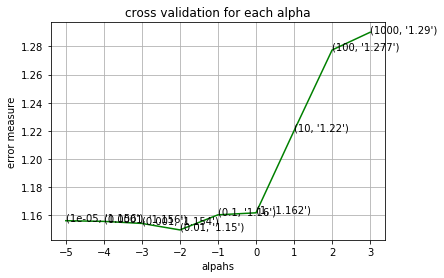

losses for usong best alpha firring the train data
log losses for train cv test datas
(2124, 9)
for using besst alpha for train datathe alpha value is 0.01 logloss is 0.5726303624835853
for using besst alpha for cv data the alpha value is 0.01 logloss is 1.1497024941078995
for using besst alpha for test data the alpha value is 0.01 logloss is 1.2195497709946728


In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
cvlogerrorarray=[]
alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
for i in alpha:
  print('for alpha',i)
  model=MultinomialNB(alpha=i)
  model.fit(task2traindata,trainy)
  sigmamodel=CalibratedClassifierCV(model,method='sigmoid')
  sigmamodel.fit(task2traindata,trainy)
  sigmaprob=sigmamodel.predict_proba(task2cvdata)
  cvlogerrorarray.append(log_loss(cvy,sigmaprob,labels=model.classes_))
  print('log loss',log_loss(cvy,sigmaprob))
fig,ax=plt.subplots()
ax.plot(np.log10(alpha),cvlogerrorarray,c='g')
for i,txt in enumerate(np.round(cvlogerrorarray,3)):
  ax.annotate((alpha[i],str(txt)),(np.log10(alpha[i]),cvlogerrorarray[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title('cross validation for each alpha')
plt.xlabel('alpahs')
plt.ylabel('error measure')
plt.show()
bestalpha=np.argmin(cvlogerrorarray)
print('losses for usong best alpha firring the train data')
model1=MultinomialNB(alpha=alpha[bestalpha])
model1.fit(task2traindata,trainy)
sigmamodel1=CalibratedClassifierCV(model1,method='sigmoid')
sigmamodel1.fit(task2traindata,trainy)
print('log losses for train cv test datas')
predicty1=sigmamodel1.predict_proba(task2traindata)
print(predicty1.shape)
print('for using besst alpha for train datathe alpha value is',alpha[bestalpha],'logloss is',log_loss(trainy,predicty1,labels=model.classes_))
predicty1=sigmamodel1.predict_proba(task2cvdata)
print('for using besst alpha for cv data the alpha value is',alpha[bestalpha],'logloss is',log_loss(cvy,predicty1,labels=model.classes_))
predicty1=sigmamodel1.predict_proba(task2testdata)
print('for using besst alpha for test data the alpha value is',alpha[bestalpha],'logloss is',log_loss(testy,predicty1,labels=model.classes_))


log loss over cv data 1.1618535809758148
confusionmatris
-------------------- Confusion matrix --------------------


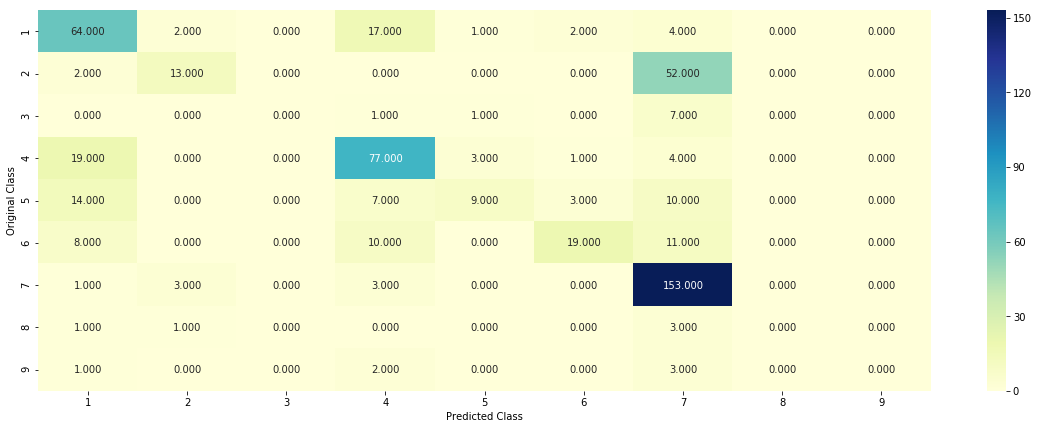

-------------------- Precision matrix (Columm Sum=1) --------------------


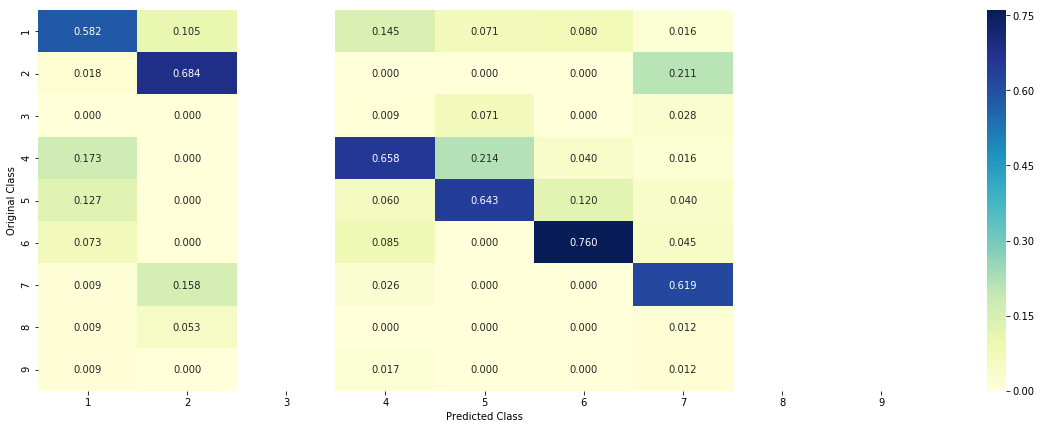

-------------------- Recall matrix (Row sum=1) --------------------


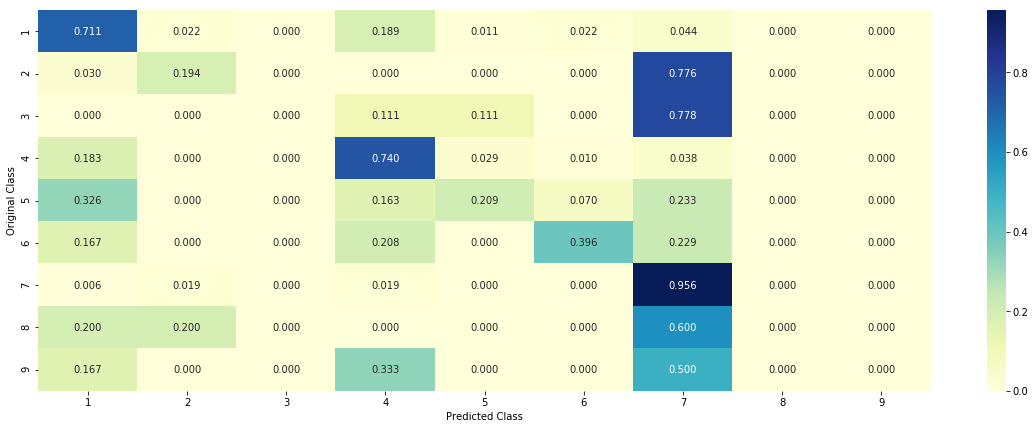

In [41]:
#model to plot the confusion matrix
testmodel=MultinomialNB(alpha=1)
testmodel.fit(task2traindata,trainy)
sigmatestmodel=CalibratedClassifierCV(testmodel,method='sigmoid')
sigmatestmodel.fit(task2traindata,trainy)
sigmaprobabilities=sigmatestmodel.predict_proba(task2cvdata)
print('log loss over cv data',log_loss(cvy,sigmaprobabilities))
plotconfusionmatrix(cvy,sigmatestmodel.predict(task2cvdata))

In [42]:
#***coef_ is nothing but the weights of each feature***
#we want to print the important features
weights=-testmodel.coef_[1]
importantweights=np.argsort(weights)[:100]
print(importantweights)

[2807   61 2868  114 2519 2390 2655  777    0 2805 2304 2537 2389 2566
 2597 2705   28 2567  339 2361 2370 2707  199 2603 3142 2545 3144 2972
  101  151 2277 2931 2989 2348 3159 2553 2607 2321 2867 2928 2404 2920
 3138 2305 2309 2802  214  163 2501 2598 3100 2975 2825 2601 2378 2192
 2291 3045  164  193 2649 2459 3147 2288 2760 3148 3092 2981   65 3078
 2451 3025 2870 2847 3011 2500 2995 3122 2583 2710 2195 2794 2803 2871
 2350 3114   66 2194 2622 2496 2613 3150 2639 2980 2865 2831 2683 2884
 2565 2940]


In [0]:
testyy=np.array(testy)

In [44]:
#printing the important features

#clf = SGDClassifier(alpha=1000, penalty='l2', loss='log', random_state=42)
sigmatestmodel.fit(task2traindata,trainy)
test_point_index = 2
no_feature = 500
predicted_cls = sigmatestmodel.predict(task2testdata[2])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmatestmodel.predict_proba(task2testdata[test_point_index]),4))
print("Actual Class :", testyy[2])



Predicted Class : 7
Predicted Class Probabilities: [[0.0375 0.0989 0.0275 0.0433 0.0473 0.0527 0.6784 0.0047 0.0097]]
Actual Class : 2


In [45]:
indices = np.argsort(-testmodel.coef_)[predicted_cls-1][:,:500]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

--------------------------------------------------
0 Text feature [mutations] present in test data point [True]
1 Text feature [cells] present in test data point [True]
3 Text feature [egfr] present in test data point [True]
4 Text feature [cell] present in test data point [True]
7 Text feature [kinase] present in test data point [True]
8 Text feature [figure] present in test data point [True]
10 Text feature [mutation] present in test data point [True]
11 Text feature [al] present in test data point [True]
12 Text feature [et] present in test data point [True]
17 Text feature [cancer] present in test data point [True]
19 Text feature [braf] present in test data point [True]
24 Text feature [tumor] present in test data point [True]
27 Text feature [tumors] present in test data point [True]
30 Text feature [expression] present in test data point [True]
35 Text feature [activity] present in test data point [True]
39 Text feature [signaling] present in test data point [True]
40 Text featu

# kneighbors classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier

for alpha 5
log loss 1.0770300461263371
for alpha 11
log loss 1.1148699920899243
for alpha 15
log loss 1.1377351844882642
for alpha 21
log loss 1.1828273740323019
for alpha 31
log loss 1.2143053986761894
for alpha 41
log loss 1.2334893900972947
for alpha 51
log loss 1.2407381129331227
for alpha 99
log loss 1.287702780906878


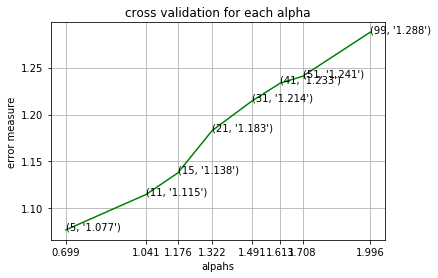

losses for usong best alpha firring the train data
log losses for train cv test datas
(2124, 9)
for using besst alpha for train datathe alpha value is 5 logloss is 1.1306177839071916
for using besst alpha for cv data the alpha value is 5 logloss is 1.1979461942513097
for using besst alpha for test data the alpha value is 5 logloss is 1.2886093541014414


In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
cvlogerrorarray=[]
alpha=[5,11,15,21,31,41,51,99]
for i in alpha:
  print('for alpha',i)
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(task2traindata,trainy)
  sigmamodel=CalibratedClassifierCV(model,method='sigmoid')
  sigmamodel.fit(task2traindata,trainy)
  sigmaprob=sigmamodel.predict_proba(task2cvdata)
  cvlogerrorarray.append(log_loss(cvy,sigmaprob,labels=model.classes_))
  print('log loss',log_loss(cvy,sigmaprob))
fig,ax=plt.subplots()
ax.plot(np.log10(alpha),cvlogerrorarray,c='g')
for i,txt in enumerate(np.round(cvlogerrorarray,3)):
  ax.annotate((alpha[i],str(txt)),(np.log10(alpha[i]),cvlogerrorarray[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title('cross validation for each alpha')
plt.xlabel('alpahs')
plt.ylabel('error measure')
plt.show()
bestalpha=np.argmin(cvlogerrorarray)
print('losses for usong best alpha firring the train data')
model1=MultinomialNB(alpha=alpha[bestalpha])
model1.fit(task2traindata,trainy)
sigmamodel1=CalibratedClassifierCV(model1,method='sigmoid')
sigmamodel1.fit(task2traindata,trainy)
print('log losses for train cv test datas')
predicty1=sigmamodel1.predict_proba(task2traindata)
print(predicty1.shape)
print('for using besst alpha for train datathe alpha value is',alpha[bestalpha],'logloss is',log_loss(trainy,predicty1,labels=model.classes_))
predicty1=sigmamodel1.predict_proba(task2cvdata)
print('for using besst alpha for cv data the alpha value is',alpha[bestalpha],'logloss is',log_loss(cvy,predicty1,labels=model.classes_))
predicty1=sigmamodel1.predict_proba(task2testdata)
print('for using besst alpha for test data the alpha value is',alpha[bestalpha],'logloss is',log_loss(testy,predicty1,labels=model.classes_))


log loss over cv data 1.1148699920899243
confusionmatris
-------------------- Confusion matrix --------------------


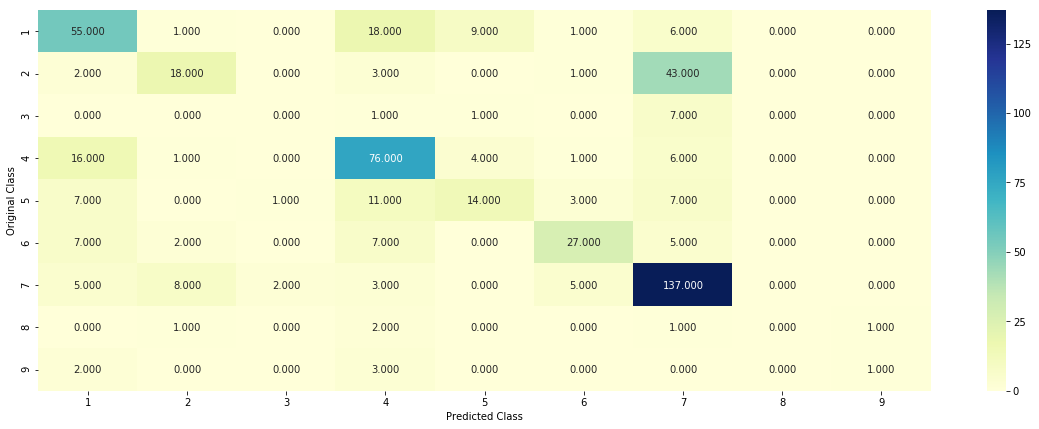

-------------------- Precision matrix (Columm Sum=1) --------------------


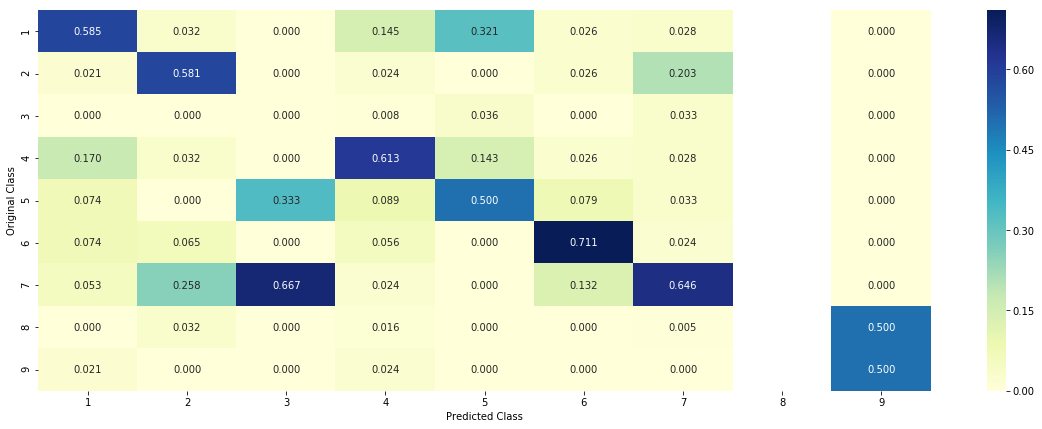

-------------------- Recall matrix (Row sum=1) --------------------


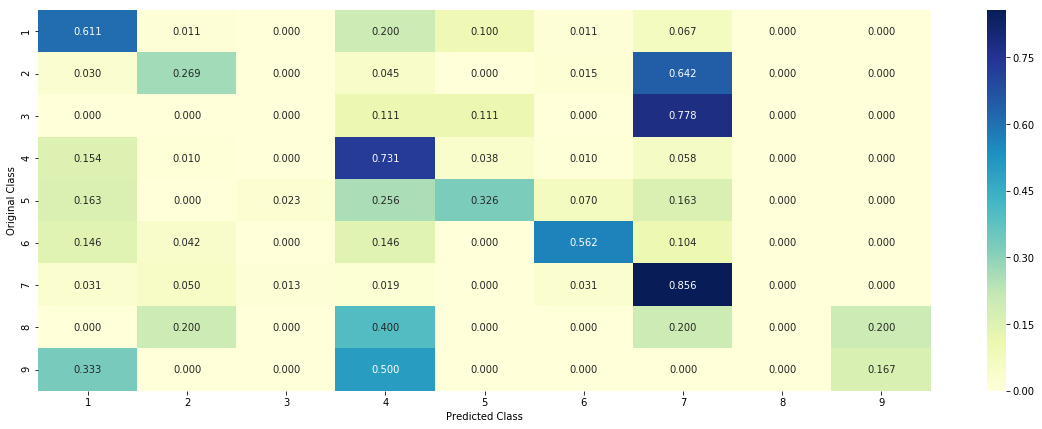

In [48]:
#model to plot the confusion matrix
testmodel=KNeighborsClassifier(n_neighbors=11)
testmodel.fit(task2traindata,trainy)
sigmatestmodel=CalibratedClassifierCV(testmodel,method='sigmoid')
sigmatestmodel.fit(task2traindata,trainy)
sigmaprobabilities=sigmatestmodel.predict_proba(task2cvdata)
print('log loss over cv data',log_loss(cvy,sigmaprobabilities))
plotconfusionmatrix(cvy,sigmatestmodel.predict(task2cvdata))

In [49]:


#clf = SGDClassifier(alpha=1000, penalty='l2', loss='log', random_state=42)
sigmatestmodel.fit(task2traindata,trainy)
test_point_index = 2
no_feature = 500
predicted_cls = sigmatestmodel.predict(task2testdata[2])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmatestmodel.predict_proba(task2testdata[test_point_index]),4))
print("Actual Class :", testyy[2])



Predicted Class : 7
Predicted Class Probabilities: [[0.0376 0.3507 0.0155 0.0489 0.0359 0.0677 0.4359 0.0032 0.0046]]
Actual Class : 2


# LOGISTIC REGRESSION WITH HYERPARAMETER TUNING

### we are using with the balanced class weight WITH SGD CLASSIFIER USING LOGLOSS AS METRIC
### WE WILL PRINT THE IMPORTANT FEATURE NAMES FOR WHEN THE PREDICTED LABEL IS TRUE AND PREDICTED LABEL IS FALSE.

for alpha = 1e-06
Log Loss : 1.1155948205124315
for alpha = 1e-05
Log Loss : 1.042523175587701
for alpha = 0.0001
Log Loss : 0.9576418936975547
for alpha = 0.001
Log Loss : 1.0121380321032345
for alpha = 0.01
Log Loss : 1.1973847526438652
for alpha = 0.1
Log Loss : 1.4798749462644236
for alpha = 1
Log Loss : 1.5781979539660747
for alpha = 10
Log Loss : 1.5909367101720275
for alpha = 100
Log Loss : 1.5924066119697182


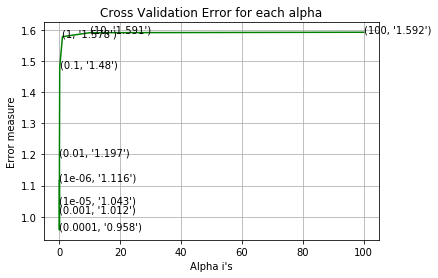

For values of best alpha =  0.0001 The train log loss is: 0.46141621855850495
For values of best alpha =  0.0001 The cross validation log loss is: 0.9576418936975547
For values of best alpha =  0.0001 The test log loss is: 1.0493258619446257


In [50]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(task2traindata,trainy)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(task2traindata, trainy)
    sig_clf_probs = sig_clf.predict_proba(task2cvdata)
    cv_log_error_array.append(log_loss(cvy, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cvy, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(task2traindata, trainy)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(task2traindata,trainy)

predict_y = sig_clf.predict_proba(task2traindata)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(trainy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task2cvdata)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(cvy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task2testdata)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(testy, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 0.9576418936975547
Number of mis-classified points : 0.325187969924812
-------------------- Confusion matrix --------------------


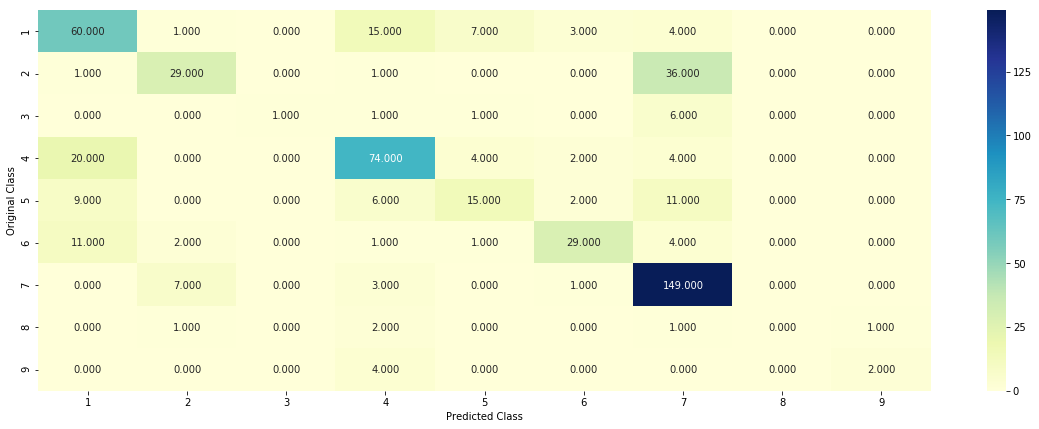

-------------------- Precision matrix (Columm Sum=1) --------------------


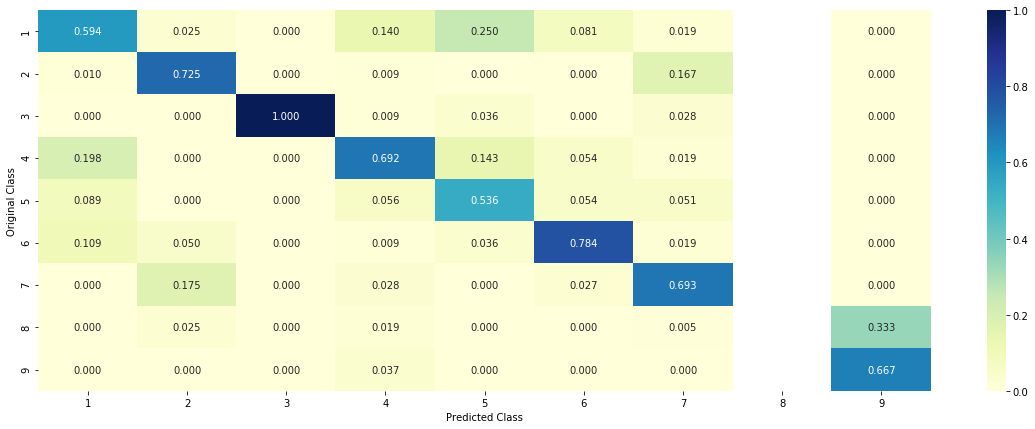

-------------------- Recall matrix (Row sum=1) --------------------


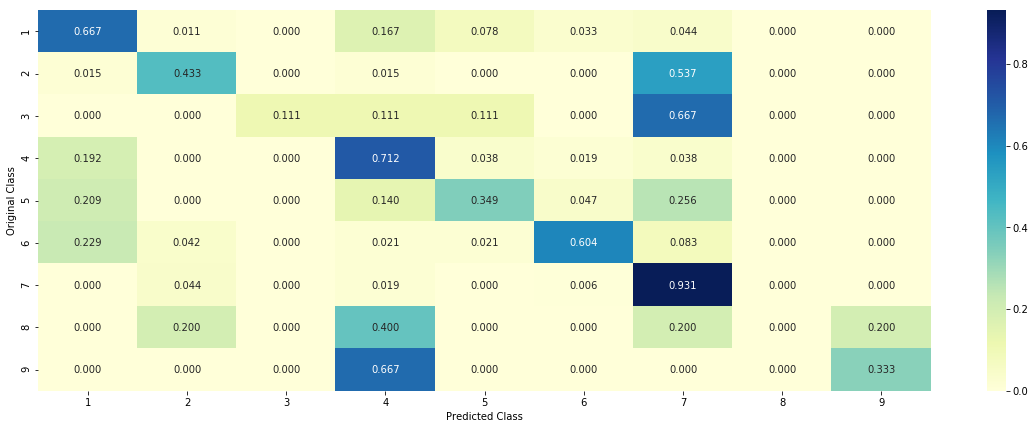

In [53]:

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(task2traindata, trainy,task2cvdata, cvy, clf)

<h4>4.3.1.3. Feature Importance</h4>

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [0]:
testyy=np.array(testy)


In [55]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(task2traindata,trainy)
test_point_index = 2
no_feature = 500
predicted_cls = clf.predict(task2testdata[2])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(clf.predict_proba(task2testdata[2]),4))
print("Actual Class :", testyy[2])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0064 0.1991 0.0034 0.009  0.0131 0.1335 0.6324 0.     0.0031]]
Actual Class : 2
--------------------------------------------------
16 Text feature [oncogene] present in test data point [True]
17 Text feature [leukemia] present in test data point [True]
27 Text feature [cells] present in test data point [True]
39 Text feature [egfr] present in test data point [True]
48 Text feature [transforming] present in test data point [True]
72 Text feature [signaling] present in test data point [True]
103 Text feature [activating] present in test data point [True]
107 Text feature [oncogenic] present in test data point [True]
118 Text feature [tumor] present in test data point [True]
154 Text feature [tumors] present in test data point [True]
187 Text feature [factor] present in test data point [True]
227 Text feature [erlotinib] present in test data point [True]
265 Text feature [transformed] present in test data point [True]
268 Text feature

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [56]:
test_point_index = 19
no_feature = 500
predicted_cls = clf.predict(task2testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(clf.predict_proba(task2testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[1.406e-01 1.120e-02 2.243e-01 5.839e-01 1.120e-02 2.410e-02 4.600e-03
  0.000e+00 2.000e-04]]
Actual Class : 4
--------------------------------------------------
14 Text feature [suppressor] present in test data point [True]
17 Text feature [families] present in test data point [True]
117 Text feature [protein] present in test data point [True]
125 Text feature [activity] present in test data point [True]
134 Text feature [germline] present in test data point [True]
183 Text feature [family] present in test data point [True]
193 Text feature [wt] present in test data point [True]
201 Text feature [functional] present in test data point [True]
220 Text feature [dna] present in test data point [True]
246 Text feature [figure] present in test data point [True]
249 Text feature [high] present in test data point [True]
257 Text feature [transfected] present in test data point [True]
263 Text feature [age] present in test data point [True]

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.1052925457724627
for alpha = 1e-05
Log Loss : 1.0391068367009966
for alpha = 0.0001
Log Loss : 0.9636210080864972
for alpha = 0.001
Log Loss : 1.0223449663924071
for alpha = 0.01
Log Loss : 1.1705931715770803
for alpha = 0.1
Log Loss : 1.3935451944662807
for alpha = 1
Log Loss : 1.501242008364178


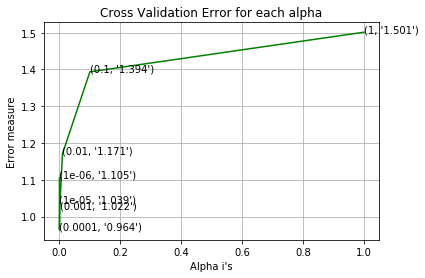

For values of best alpha =  0.0001 The train log loss is: 0.45108087508676065
For values of best alpha =  0.0001 The cross validation log loss is: 0.9636210080864972
For values of best alpha =  0.0001 The test log loss is: 1.0580631539877763


In [57]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(task2traindata, trainy)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(task2traindata, trainy)
    sig_clf_probs = sig_clf.predict_proba(task2cvdata)
    cv_log_error_array.append(log_loss(cvy, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cvy, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(task2traindata, trainy)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(task2traindata, trainy)

predict_y = sig_clf.predict_proba(task2traindata)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(trainy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task2cvdata)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(cvy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task2testdata)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(testy, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 0.9636210080864972
Number of mis-classified points : 0.325187969924812
-------------------- Confusion matrix --------------------


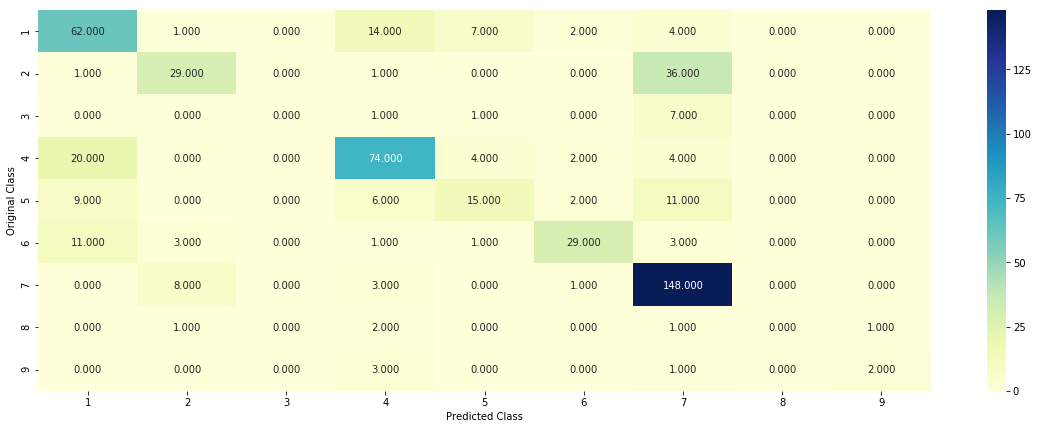

-------------------- Precision matrix (Columm Sum=1) --------------------


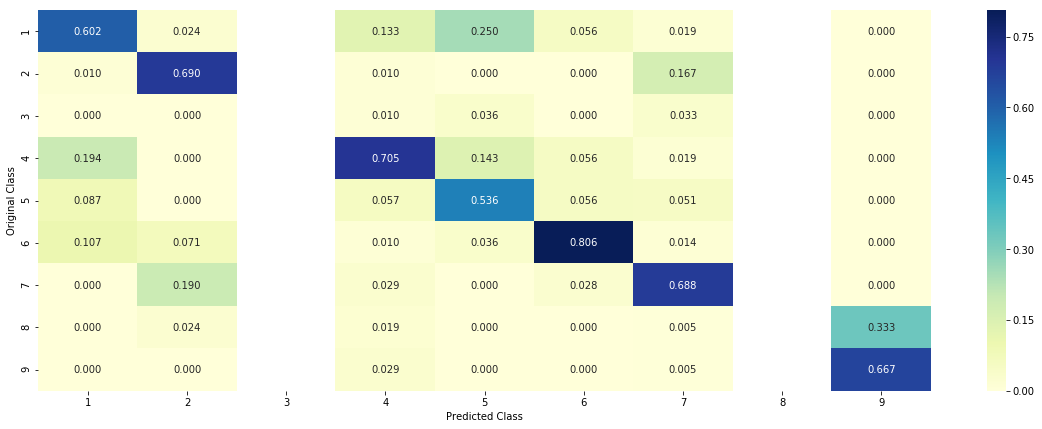

-------------------- Recall matrix (Row sum=1) --------------------


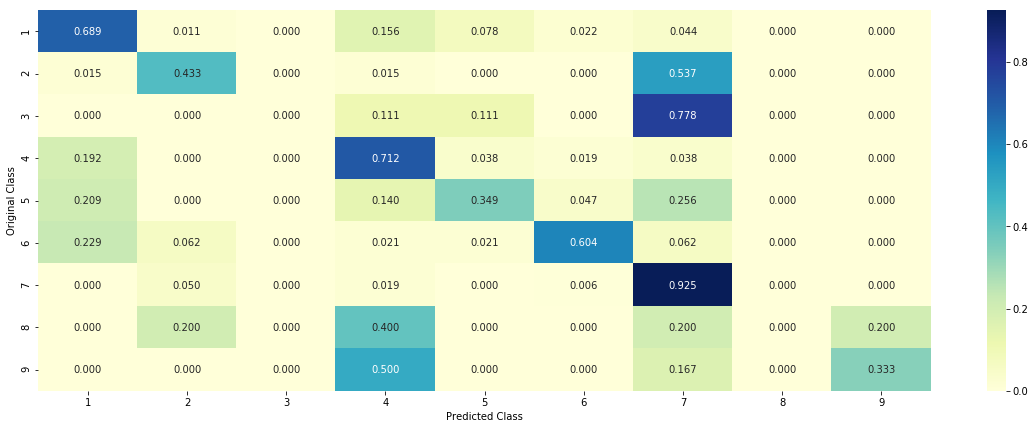

In [58]:


clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(task2traindata, trainy, task2cvdata, cvy, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [59]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(task2traindata,trainy)
test_point_index = 7
no_feature = 500
predicted_cls = sig_clf.predict(task2testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(task2testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0527 0.2921 0.027  0.054  0.0514 0.0284 0.4693 0.0083 0.0167]]
Actual Class : 7
--------------------------------------------------
8 Text feature [activation] present in test data point [True]
10 Text feature [codon] present in test data point [True]
39 Text feature [oncogene] present in test data point [True]
79 Text feature [cells] present in test data point [True]
94 Text feature [catenin] present in test data point [True]
128 Text feature [transforming] present in test data point [True]
148 Text feature [oncogenic] present in test data point [True]
155 Text feature [fig] present in test data point [True]
179 Text feature [phosphorylation] present in test data point [True]
183 Text feature [signaling] present in test data point [True]
184 Text feature [factor] present in test data point [True]
189 Text feature [insertion] present in test data point [True]
193 Text feature [tumor] present in test data point [True]
205 Text featur

<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [60]:
test_point_index =3
no_feature = 500
predicted_cls = sig_clf.predict(task2traindata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(task2testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.4686 0.0098 0.0076 0.201  0.2427 0.0613 0.0058 0.0028 0.0005]]
Actual Class : 5
--------------------------------------------------
68 Text feature [deleterious] present in test data point [True]
104 Text feature [individuals] present in test data point [True]
113 Text feature [values] present in test data point [True]
118 Text feature [kinase] present in test data point [True]
125 Text feature [interaction] present in test data point [True]
128 Text feature [brca1] present in test data point [True]
135 Text feature [associated] present in test data point [True]
138 Text feature [interactions] present in test data point [True]
154 Text feature [blue] present in test data point [True]
159 Text feature [helix] present in test data point [True]
160 Text feature [substitution] present in test data point [True]
163 Text feature [identified] present in test data point [True]
164 Text feature [structural] present in test data point [True]


In [0]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler(with_mean=False)
task2traindata=scale.fit_transform(task2traindata)
task2cvdata=scale.fit_transform(task2cvdata)
task2testdata=scale.fit_transform(task2testdata)

<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.1470385635266724
for C = 0.0001
Log Loss : 1.1438657630023839
for C = 0.001
Log Loss : 1.1369178225624827
for C = 0.01
Log Loss : 1.1465717577859764
for C = 0.1
Log Loss : 1.1159124071407158
for C = 1
Log Loss : 1.05057480227825
for C = 10
Log Loss : 1.5412921232206227
for C = 100
Log Loss : 1.7975413856270357


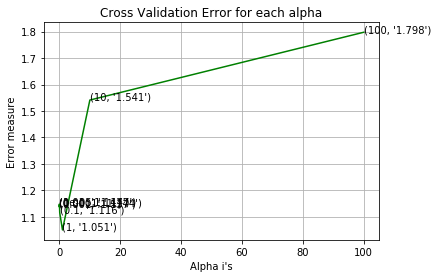

For values of best alpha =  1 The train log loss is: 0.4118454548834484
For values of best alpha =  1 The cross validation log loss is: 1.05057480227825
For values of best alpha =  1 The test log loss is: 1.1838746389491466


In [62]:

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(task2traindata, trainy)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(task2traindata, trainy)
    sig_clf_probs = sig_clf.predict_proba(task2cvdata)
    cv_log_error_array.append(log_loss(cvy, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cvy, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(task2traindata, trainy)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(task2traindata, trainy)

predict_y = sig_clf.predict_proba(task2traindata)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(trainy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task2cvdata)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(cvy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task2testdata)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(testy, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.05057480227825
Number of mis-classified points : 0.33646616541353386
-------------------- Confusion matrix --------------------


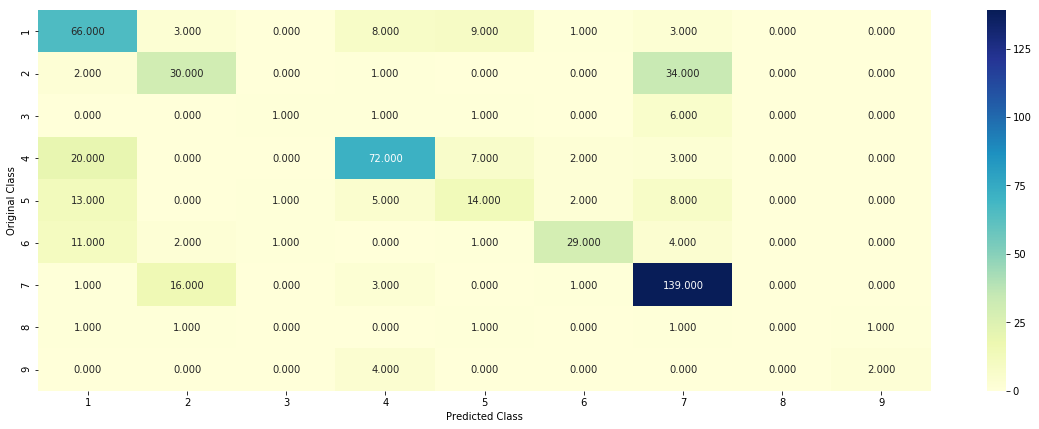

-------------------- Precision matrix (Columm Sum=1) --------------------


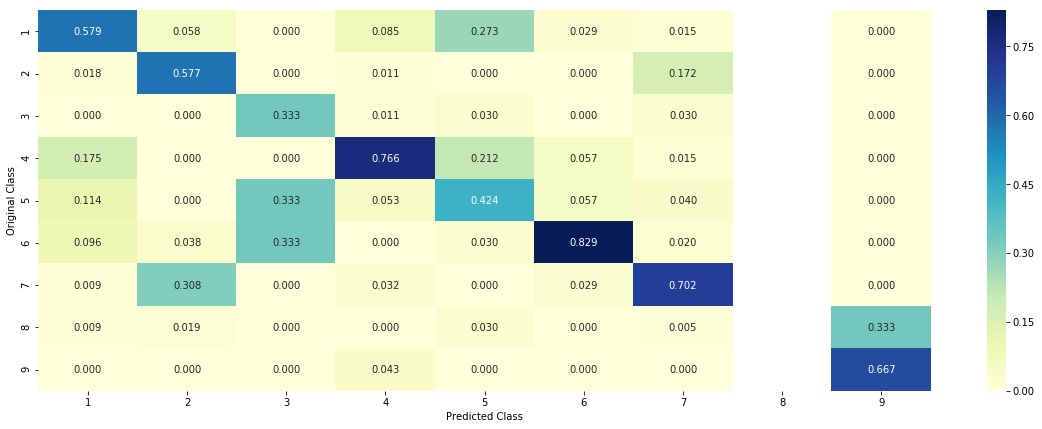

-------------------- Recall matrix (Row sum=1) --------------------


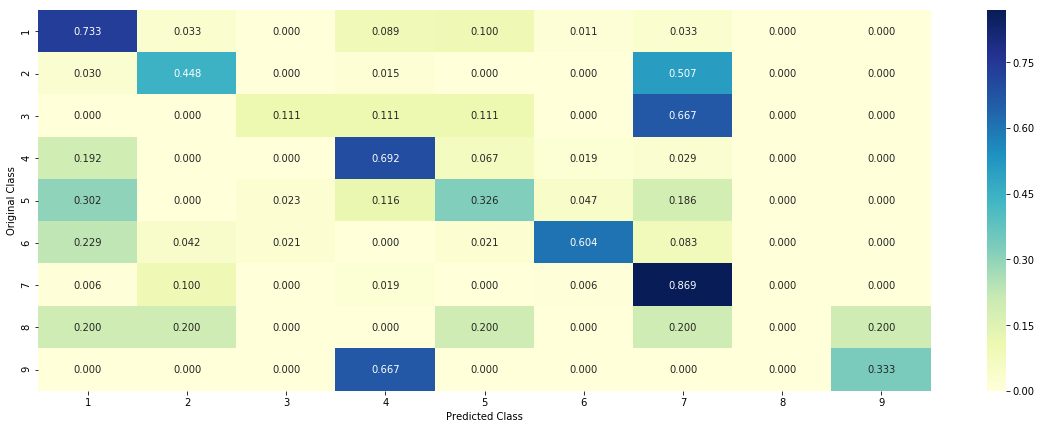

In [63]:

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(task2traindata, trainy,task2cvdata,cvy, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [64]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(task2traindata,trainy)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(task2testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(task2testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[5.980e-01 6.890e-02 1.300e-03 2.872e-01 1.360e-02 1.030e-02 1.550e-02
  4.800e-03 2.000e-04]]
Actual Class : 1
--------------------------------------------------
2 Text feature [deletion] present in test data point [True]
3 Text feature [loss] present in test data point [True]
5 Text feature [deletions] present in test data point [True]
7 Text feature [deficient] present in test data point [True]
8 Text feature [region] present in test data point [True]
9 Text feature [p53] present in test data point [True]
139 Text feature [surface] present in test data point [True]
141 Text feature [panel] present in test data point [True]
143 Text feature [role] present in test data point [True]
145 Text feature [repeats] present in test data point [True]
147 Text feature [sequenced] present in test data point [True]
237 Text feature [encoding] present in test data point [True]
238 Text feature [signal] present in test data point [True]
244 Text f

<h4>4.3.3.2. For Incorrectly classified point</h4>

In [65]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(task2testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(task2testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1229 0.066  0.1316 0.4813 0.0561 0.0408 0.0855 0.0047 0.0112]]
Actual Class : 3
--------------------------------------------------
1 Text feature [missense] present in test data point [True]
166 Text feature [tagged] present in test data point [True]
170 Text feature [families] present in test data point [True]
179 Text feature [iii] present in test data point [True]
185 Text feature [activity] present in test data point [True]
297 Text feature [caused] present in test data point [True]
300 Text feature [26] present in test data point [True]
303 Text feature [min] present in test data point [True]
304 Text feature [functional] present in test data point [True]
308 Text feature [unable] present in test data point [True]
310 Text feature [indicate] present in test data point [True]
311 Text feature [mm] present in test data point [True]
312 Text feature [transfected] present in test data point [True]
313 Text feature [see] present in

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

for n_estimators = 100 and max depth =  5
Log Loss : 1.1076453344019432
for n_estimators = 100 and max depth =  10
Log Loss : 1.075704280070439
for n_estimators = 200 and max depth =  5
Log Loss : 1.0984398504182096
for n_estimators = 200 and max depth =  10
Log Loss : 1.06235792132091
for n_estimators = 500 and max depth =  5
Log Loss : 1.0924058645350976
for n_estimators = 500 and max depth =  10
Log Loss : 1.0599642804021703
for n_estimators = 1000 and max depth =  5
Log Loss : 1.0932642740249068
for n_estimators = 1000 and max depth =  10
Log Loss : 1.0600107477668508
for n_estimators = 2000 and max depth =  5
Log Loss : 1.0908477580146598
for n_estimators = 2000 and max depth =  10
Log Loss : 1.0610199867870573


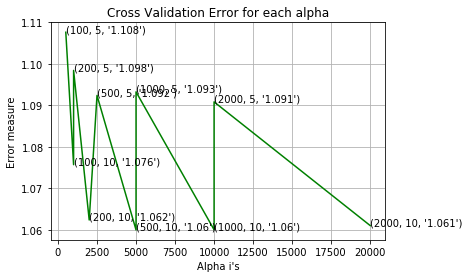

For values of best estimator =  500 The train log loss is: 0.5402621362771419
For values of best estimator =  500 The cross validation log loss is: 1.0599642804021705
For values of best estimator =  500 The test log loss is: 1.124675607307026


In [66]:

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(task2traindata, trainy)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(task2traindata, trainy)
        sig_clf_probs = sig_clf.predict_proba(task2cvdata)
        cv_log_error_array.append(log_loss(cvy, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cvy, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(task2traindata, trainy)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(task2traindata, trainy)

predict_y = sig_clf.predict_proba(task2traindata)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(trainy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task2cvdata)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(cvy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task2testdata)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(testy, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.0599642804021705
Number of mis-classified points : 0.34398496240601506
-------------------- Confusion matrix --------------------


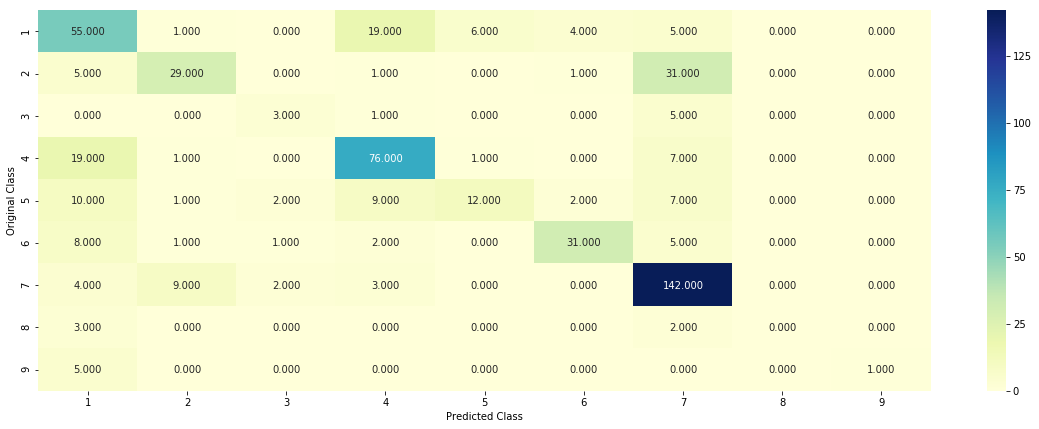

-------------------- Precision matrix (Columm Sum=1) --------------------


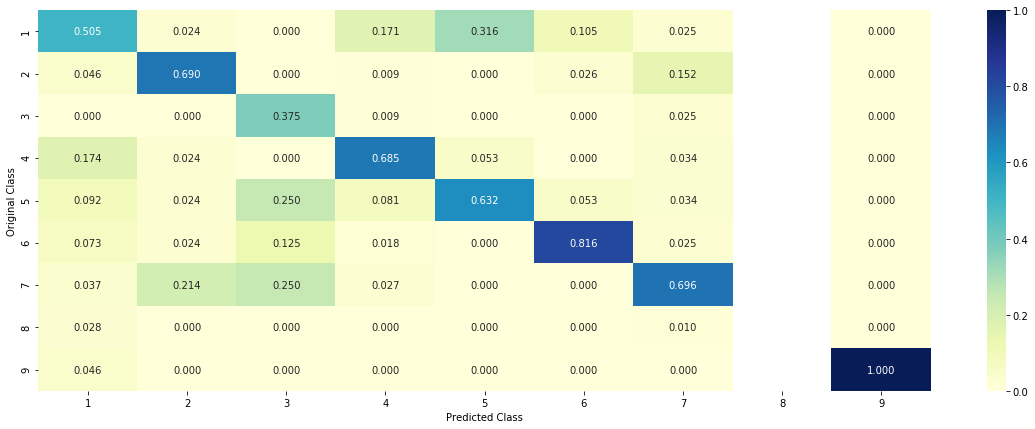

-------------------- Recall matrix (Row sum=1) --------------------


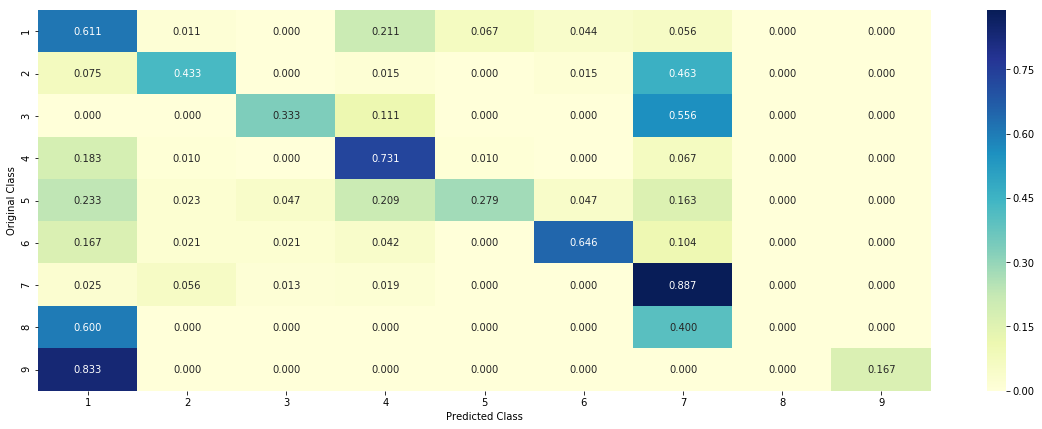

In [67]:

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(task2traindata,trainy,task2cvdata,cvy, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [68]:
test_point_index = 3
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(task2traindata, trainy)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(task2traindata, trainy)


no_feature = 100
predicted_cls = sig_clf.predict(task2testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(task2testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5335 0.0296 0.0156 0.2618 0.0926 0.0314 0.0271 0.0024 0.006 ]]
Actual Class : 5
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
1 Text feature [activating] present in test data point [True]
3 Text feature [function] present in test data point [True]
4 Text feature [suppressor] present in test data point [True]
5 Text feature [phosphorylation] present in test data point [True]
6 Text feature [activation] present in test data point [True]
7 Text feature [constitutive] present in test data point [True]
8 Text feature [treatment] present in test data point [True]
10 Text feature [loss] present in test data point [True]
12 Text feature [missense] present in test data point [True]
13 Text feature [functional] present in test data point [True]
15 Text feature [protein] present in test data point [True]
17 Text feature [therapy] present in test data point [True]
18 Text feature [

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [69]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(task2testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(task2testdata[test_point_index]),4))
print("Actuall Class :", testyy[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.0903 0.041  0.0851 0.6641 0.0399 0.0294 0.0409 0.0026 0.0068]]
Actuall Class : 3
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
1 Text feature [activating] present in test data point [True]
3 Text feature [function] present in test data point [True]
5 Text feature [phosphorylation] present in test data point [True]
6 Text feature [activation] present in test data point [True]
7 Text feature [constitutive] present in test data point [True]
11 Text feature [inhibitors] present in test data point [True]
12 Text feature [missense] present in test data point [True]
13 Text feature [functional] present in test data point [True]
15 Text feature [protein] present in test data point [True]
18 Text feature [expression] present in test data point [True]
19 Text feature [cells] present in test data point [True]
22 Text feature [variants] present in test data point [True]
24 Text fea

<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [70]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(task2traindata, trainy)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(task2traindata, trainy)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(task2traindata, trainy)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(task2traindata, trainy)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cvy, sig_clf1.predict_proba(task2cvdata))))
sig_clf2.fit(task2traindata, trainy)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cvy, sig_clf2.predict_proba(task2cvdata))))
sig_clf3.fit(task2traindata, trainy)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cvy, sig_clf3.predict_proba(task2cvdata))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(task2traindata, trainy)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cvy, sclf.predict_proba(task2cvdata))))
    log_error =log_loss(cvy, sclf.predict_proba(task2cvdata))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.15
Support vector machines : Log Loss: 1.05
Naive Bayes : Log Loss: 1.28
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.177
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.026
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.483
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.061
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.138
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.491


In [71]:
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(task2traindata, trainy)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(task2traindata, trainy)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(task2traindata, trainy)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(task2traindata, trainy)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cvy, sig_clf1.predict_proba(task2cvdata))))
sig_clf2.fit(task2traindata, trainy)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cvy, sig_clf2.predict_proba(task2cvdata))))
sig_clf3.fit(task2traindata, trainy)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cvy, sig_clf3.predict_proba(task2cvdata))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(task2traindata, trainy)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cvy, sclf.predict_proba(task2cvdata))))
    log_error =log_loss(cvy, sclf.predict_proba(task2cvdata))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.15
Support vector machines : Log Loss: 1.05
Naive Bayes : Log Loss: 1.28
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.177
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.026
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.483
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.061
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.138
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.491


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.3579246661366974
Log loss (CV) on the stacking classifier : 1.0605314963390542
Log loss (test) on the stacking classifier : 1.219426588821643
Number of missclassified point : 0.3774436090225564
-------------------- Confusion matrix --------------------


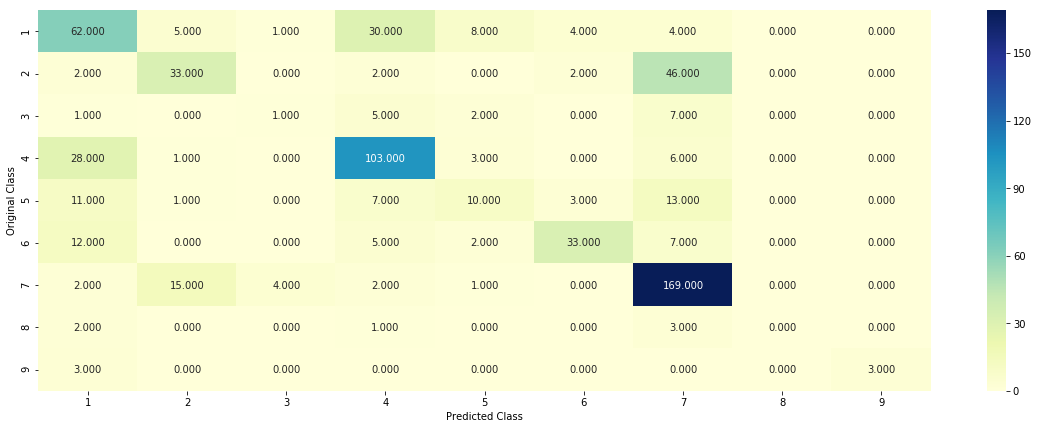

-------------------- Precision matrix (Columm Sum=1) --------------------


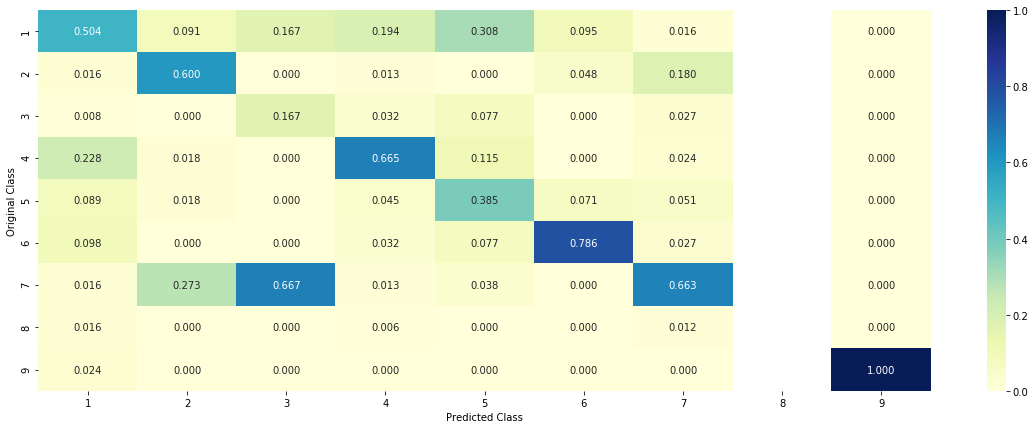

-------------------- Recall matrix (Row sum=1) --------------------


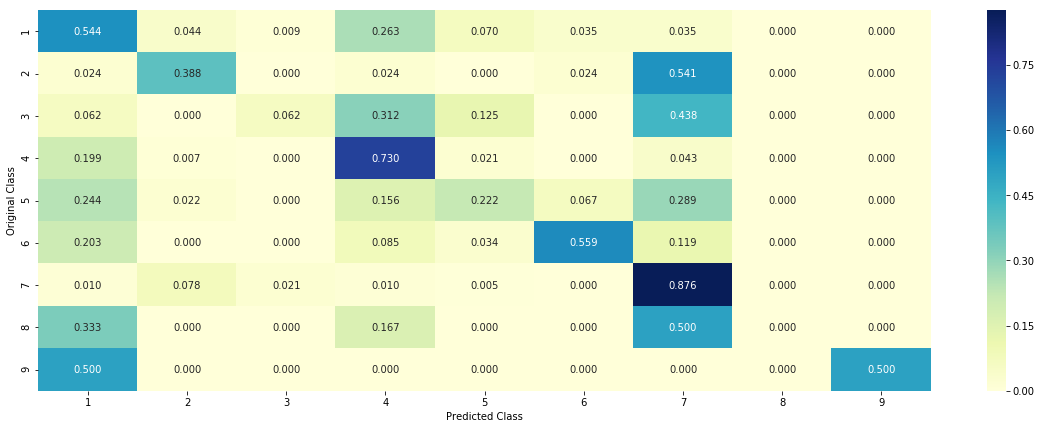

In [72]:

from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(task2traindata, trainy)

log_error = log_loss(trainy, sclf.predict_proba(task2traindata))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cvy, sclf.predict_proba(task2cvdata))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(testy, sclf.predict_proba(task2testdata))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(task2testdata)- testy))/testy.shape[0])
plot_confusion_matrix(test_y=testy, predict_y=sclf.predict(task2testdata))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.5816961771388032
Log loss (CV) on the VotingClassifier : 1.108515047188348
Log loss (test) on the VotingClassifier : 1.2259030618329134
Number of missclassified point : 0.37894736842105264
-------------------- Confusion matrix --------------------


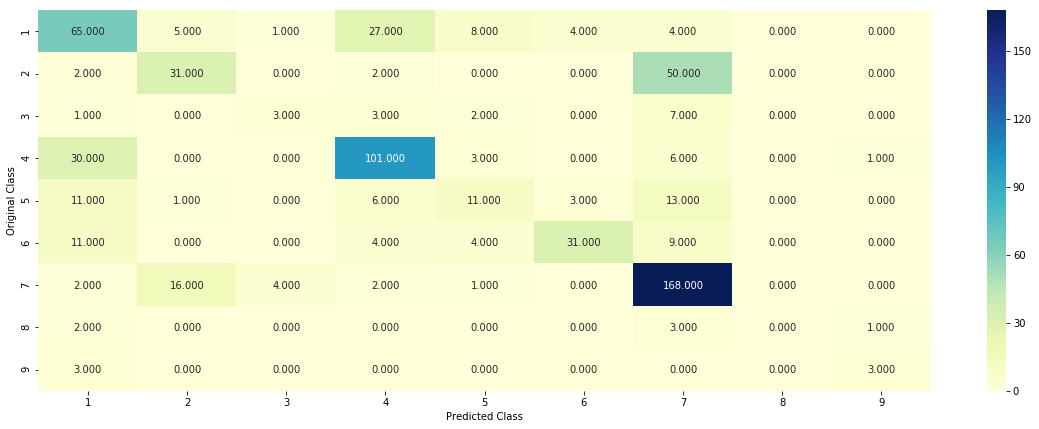

-------------------- Precision matrix (Columm Sum=1) --------------------


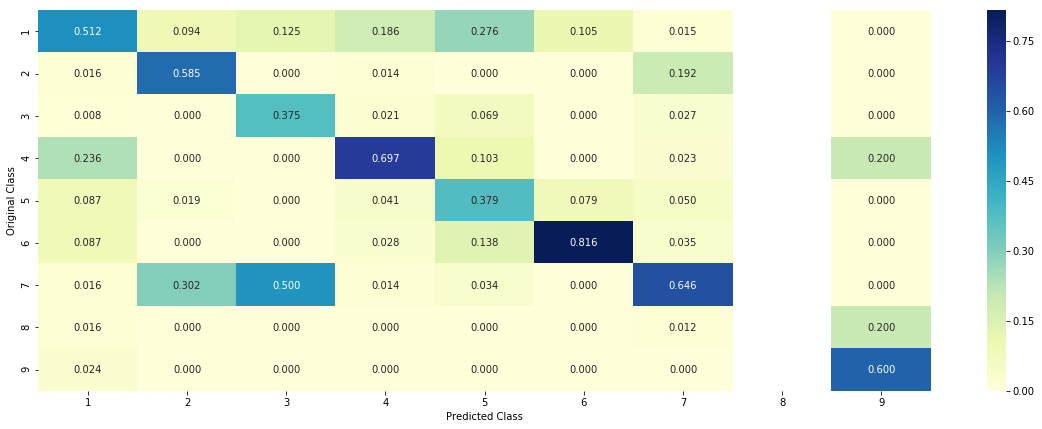

-------------------- Recall matrix (Row sum=1) --------------------


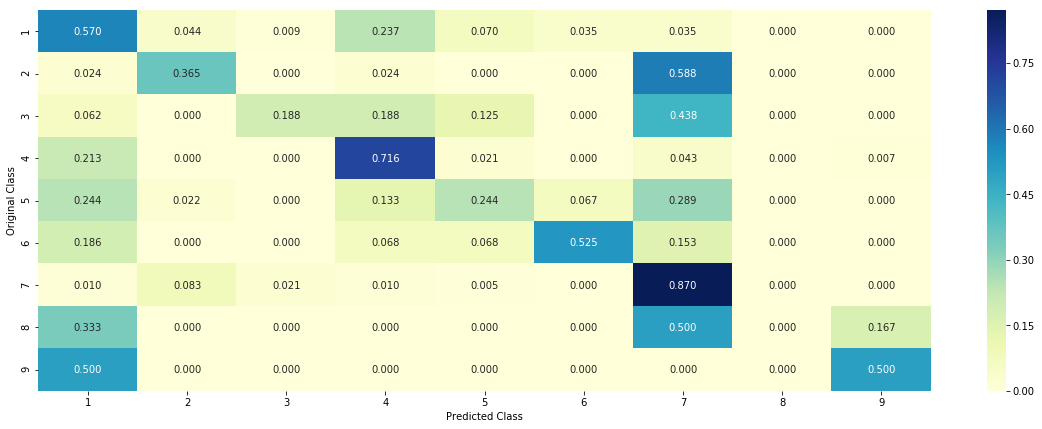

In [73]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(task2traindata, trainy)
print("Log loss (train) on the VotingClassifier :", log_loss(trainy, vclf.predict_proba(task2traindata)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cvy, vclf.predict_proba(task2cvdata)))
print("Log loss (test) on the VotingClassifier :", log_loss(testy, vclf.predict_proba(task2testdata)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(task2testdata)- testy))/testy.shape[0])
plot_confusion_matrix(test_y=testy, predict_y=vclf.predict(task2testdata))

#DOCUMENTATION CONCLUSIONS AND KEYTAKEAWAYS

In [0]:
import pandas as pd
dta = [['NAIVE BAYES MODEL','ALPHA=0.01',0.57,1.14,1.21],['KNN MODEL','NUMBER_OF_NEIGHBORS=5',1.13,1.19,1.28],['LOGISTIC REGRESSION','ALPHA=0.0001',0.46,0.95,1.04],['LOGISTIC REGRESSION WITH OUT CLASS BALANCING','ALPHA=0.0001',0.45,0.96,1.05],['LINEAR SVM','ALPHA=1',0.41,1.05,1.18],['RANDOM FOREST CLASSIFIER','NUMBER OF ESTIMATORS=500',0.54,1.05,1.12],['STACKING CLASSIFIER','ALPHA=0.1',0.35,1.06,1.21],['MAXIMUM VOTING CLASSIFIER','ALPHA=0.1',0.58,1.1,1.2]]
aa=pd.DataFrame(dta, columns=['model','BEST HYPER PARAMETER','TRAIN_LOG_LOSS','CROSS_VALIDATAION_LOGLOSS','TEST_LOG_LOSS'])

In [80]:
aa

,model,BEST HYPER PARAMETER,TRAIN_LOG_LOSS,CROSS_VALIDATAION_LOGLOSS,TEST_LOG_LOSS
0,NAIVE BAYES MODEL,ALPHA=0.01,0.57,1.14,1.21
1,KNN MODEL,NUMBER_OF_NEIGHBORS=5,1.13,1.19,1.28
2,LOGISTIC REGRESSION,ALPHA=0.0001,0.46,0.95,1.04
3,LOGISTIC REGRESSION WITH OUT CLASS BALANCING,ALPHA=0.0001,0.45,0.96,1.05
4,LINEAR SVM,ALPHA=1,0.41,1.05,1.18
5,RANDOM FOREST CLASSIFIER,NUMBER OF ESTIMATORS=500,0.54,1.05,1.12
6,STACKING CLASSIFIER,ALPHA=0.1,0.35,1.06,1.21
7,MAXIMUM VOTING CLASSIFIER,ALPHA=0.1,0.58,1.10,1.20


####AS A PART OF TASK1 WE HAVE USED THE COUNT VECTORIZER IN TASK2 WE HAVE USED WITH TOP TFIDF VALUES. WE DEPLOY INTO THE MODELS WE HAVE OBTAINED THE PERFORMANCE OF THE MODELSDISPLAYED IN THE ABOVE TABLE.WE  HAVE OBTAINED THE GOOD PERFORMANCE ON THE TOP 1000 TFIDF VALUES INSTEAD OF CONSIDERING ALL THE VALUES IN THE DATA. WE HAVE ACHIEVED THE TEST  LOG LOSS NEAR TO 1. WHER EWE HAVE ACHIEVED SIMILAR THING IN THE CASE OF CONSIDERING ALL THE WORDS. HAVING ALL THE WORDS WILL LEAD TO THE CURSE OF DIMENSIONALTY AND TIME TAKEN TO TRAIN AND TEST THE DATA WILL BE MORE. WE CAN OBTAIN THE FEATURRES BASED ON THEIR IMPORTANCE AND USE THE FEATURES WHILE BULIDING THE MODEL.